In [15]:
# Exercise 12: Iris Classification using Logistic Regression (CSV Dataset)
# ---------------------------------------------------------------
# This program trains a logistic regression model to classify 
# iris flowers into Setosa, Versicolor, or Virginica species 
# using four features: sepal length, sepal width, petal length, and petal width.

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("/Users/jacobfrancis/dev/csc180/csv/iris.csv")

In [ ]:
# Display dataset shape and first few rows
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())

Dataset Shape: (150, 5)
First 5 Rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Convert text labels to numeric codes
# 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica
data['species'] = data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

In [19]:
# Define feature columns (inputs) and target column (output)
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [20]:
# Split data into training (80%) and testing (20%) sets
# random_state ensures results are reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Create and train the logistic regression model
# max_iter increased to ensure convergence
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [28]:
# Evaluate model performance
model_score = model.score(X_test, y_test)
accuracy = model.score(X_test, y_test)
print("Model Score:", model_score)
print("Model Accuracy:", accuracy)

Model Score: 1.0
Model Accuracy: 1.0


In [23]:
# Predict test set results and create a confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


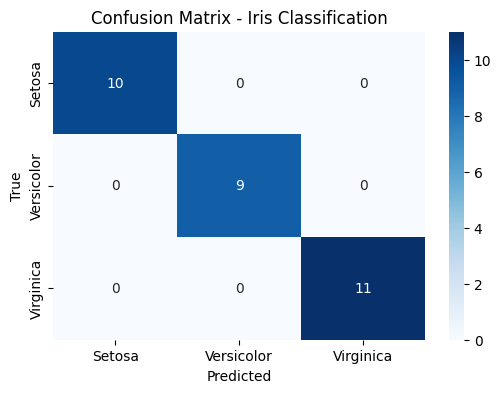

In [24]:
# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='d',
           xticklabels=['Setosa', 'Versicolor', 'Virginica'],
           yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Iris Classification')
plt.show()

In [25]:
# Predict new flower samples using the trained model
# Each row represents [sepal_length, sepal_width, petal_length, petal_width]
sample_data = [
    [5.1, 3.5, 1.4, 0.2],  # Expected: Setosa
    [4.9, 3.0, 1.4, 0.2],  # Expected: Setosa
    [6.0, 2.9, 4.5, 1.5],  # Expected: Versicolor
    [5.7, 2.8, 4.1, 1.3],  # Expected: Versicolor
    [6.9, 3.1, 5.4, 2.1],  # Expected: Virginica
    [7.7, 3.8, 6.7, 2.2]   # Expected: Virginica
]

In [26]:
# Make predictions for the sample data
predictions = model.predict(sample_data)
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
# Display sample predictions with labels
print("\nSample Predictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {species_names[pred]}")


Sample Predictions:
Sample 1: Iris-setosa
Sample 2: Iris-setosa
Sample 3: Iris-versicolor
Sample 4: Iris-versicolor
Sample 5: Iris-virginica
Sample 6: Iris-virginica
